In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def regressao_linear(X, y):
    # Verifica se X é uma array 1D e transforma em 2D (necessário para scikit-learn)
    if len(X.shape) == 1:
        X = X.reshape(-1, 1)
        
    # Inicializa o modelo de regressão linear
    modelo = LinearRegression()
    
    # Ajusta o modelo aos dados
    modelo.fit(X, y)
    
    # Obtém os coeficientes
    coeficiente = modelo.coef_
    intercepto = modelo.intercept_
    r2 = modelo.score(X, y)  # Coeficiente de determinação R^2
    
    return {
        "coeficiente": coeficiente,
        "intercepto": intercepto,
        "R2": r2
    }


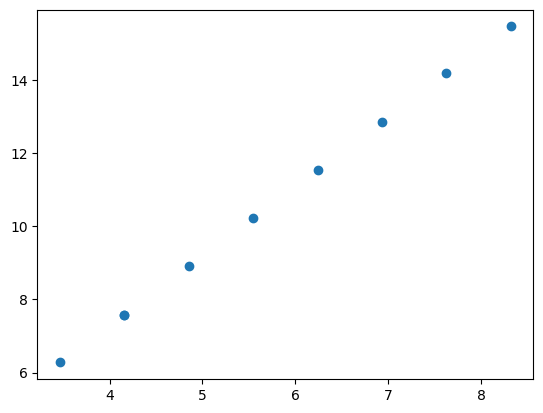

In [2]:
big_cluster = np.loadtxt('./output/big_cluster.txt')
plt.scatter(np.log(big_cluster[:,0]),np.log(big_cluster[:,1]))
df = regressao_linear(np.log(big_cluster[:,0]),np.log(big_cluster[:,1]))
plt.show()


In [3]:
df


{'coeficiente': array([1.89571377]),
 'intercepto': -0.29422051466643495,
 'R2': 0.9999933421419824}

In [ ]:
critical = np.loadtxt('./output/prob_1024.txt')


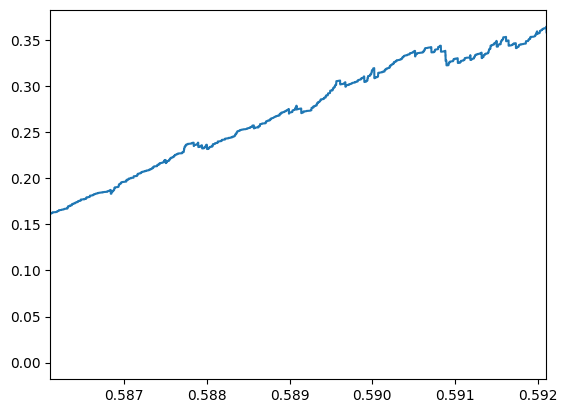

In [17]:
plt.plot(np.arange(len(critical))/(1024*1024),critical)
m = np.arange(len(critical))[np.argmax(critical)]/(1024*1024)
plt.xlim(m-0.006,m)
plt.show()


In [ ]:
m


620869

In [6]:

clusters = np.loadtxt('./output/clusters_1024.txt')


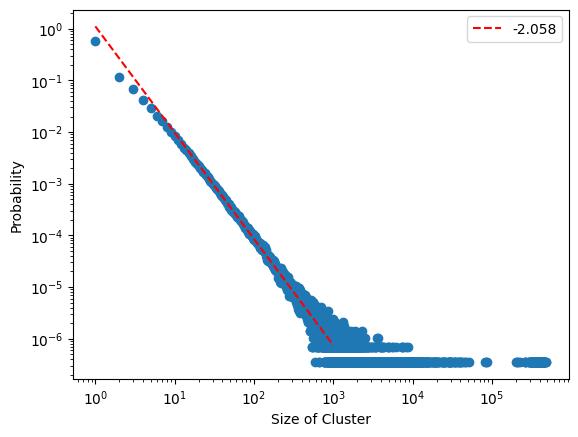

In [7]:
x,y = np.unique(clusters,return_counts = True)
y = y/np.sum(y)

df = regressao_linear(np.log10(x[x<1000]),np.log10(y[x<1000]))
plt.scatter(x,y)
plt.plot(x[x<1000], 10**(df['coeficiente'] * np.log10(x[x<1000]) + df['intercepto']),'--', color='red',label = np.round(df['coeficiente'][0],3))

plt.ylabel('Probability')
plt.xlabel('Size of Cluster')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()
